In [1]:
import autolens as al
import autolens.plot as aplt

from astropy import cosmology as cosmo
import matplotlib.pyplot as plt
from os import path

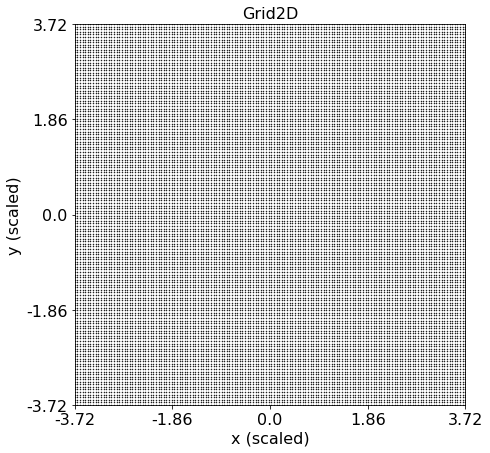

In [8]:
grid = al.Grid2D.uniform(
    shape_native=(150, 150),
    pixel_scales=0.05,  # <- The pixel-scale describes the conversion from pixel units to arc-seconds.
)

grid_plotter = aplt.Grid2DPlotter(grid=grid)
grid_plotter.figure()

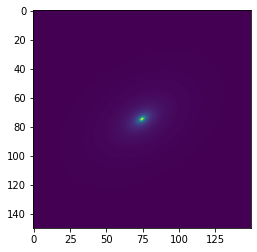

In [50]:
sersic_light_profile = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.2, 0.1),
    intensity=0.1,
    effective_radius=2.0,
    sersic_index=4.0,
)
image = sersic_light_profile.image_from_grid(grid=grid)

plt.imshow(image.native)

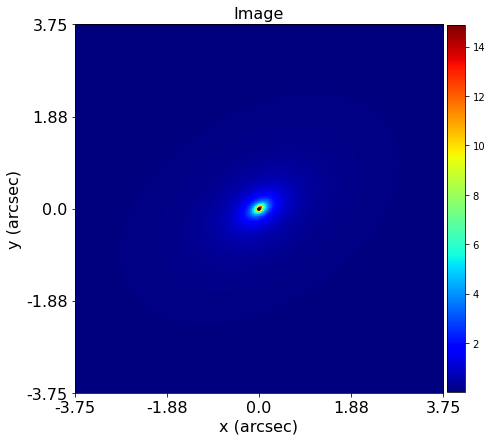

In [51]:
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=sersic_light_profile, grid=grid
)
light_profile_plotter.figures(image=True)

In [52]:
sersic_mass_profile = al.mp.EllipticalSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.2, 0.1),
    intensity=0.1,
    effective_radius=2.0,
    sersic_index=4.0,
)

deflections = sersic_mass_profile.deflections_from_grid(grid=grid)

In [53]:
lens_galaxy = al.Galaxy(
    redshift=0.5, light=sersic_light_profile, mass=sersic_mass_profile
)

source_light_profile = al.lp.EllipticalExponential(
    centre=(0, 0),
    elliptical_comps=(0., 0.0),
    intensity=0.1,
    effective_radius=1
)

source_galaxy = al.Galaxy(redshift=1.0, light=source_light_profile)

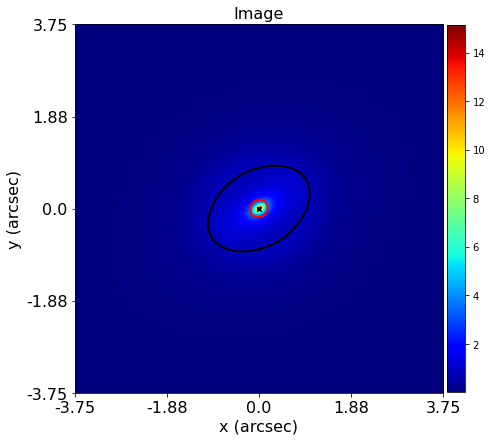

In [54]:
tracer = al.Tracer.from_galaxies(
    galaxies=[lens_galaxy, source_galaxy], cosmology=cosmo.Planck15
)

image = tracer.image_from_grid(grid=grid)

tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)